# Hướng dẫn cách dùng Logistic Regression

In [1]:
import pandas as pd
import numpy as np

x = np.random.randint(low=-100, high=100, size=100)        # Tạo ngẫu nhiên N số thực trong khoảng từ -100 đến 100, gán vào mảng x.
y = [0 if i < 0 else 1 for i in x]                         # Tính N giá trị y: 0 nếu x < 0 và 1 nếu x > 0, gán vào mảng y.

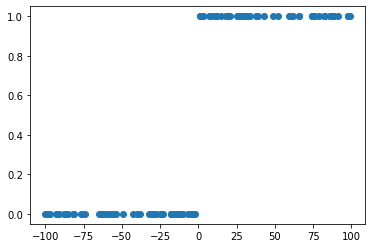

In [2]:
import matplotlib.pyplot as plt
plt.scatter(x, y);                      # Vẽ các cặp giá trị (x,y)

In [3]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(fit_intercept=True)        # Khởi tạo mô hình Logistic Regression

Tham số ``fit_intercept`` xác định việc thêm hằng số $a_0$ (bias) vào hàm Logistic Regression.
- ``fit_intercept = True``: hàm Logistic Regression có dạng
\begin{equation*}
p = \frac{1}{1+e^{a_0+a_1x}}
\end{equation*}
- ``fit_intercept = False``: hàm Logistic Regression có dạng
\begin{equation*}
p = \frac{1}{1+e^{a_1x}}
\end{equation*}


In [4]:
model.fit(x[:, np.newaxis], y)      # Học mô hình dựa trên x và y

LogisticRegression()

``x[:, np.newaxis]``: hàm ``np.newaxis`` tăng số chiều của vector ``x`` (1D) lên 1, đồng nghĩa với chuyển ``x`` sang vector cột (2D). Đây là yêu cầu của ``sklearn`` từ phiên bản 0.19.

xfit = [-89 -16 -34  49  10 -26 -97 -10  28 -11]
xfit = [0 0 0 1 1 0 0 0 1 0]
Accuracy: 1.0


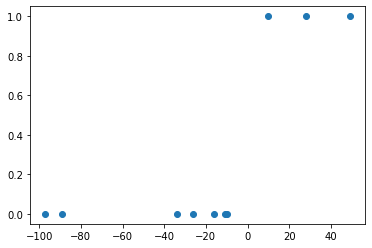

In [5]:
from sklearn.metrics import accuracy_score
xfit = np.random.randint(low=-100, high=100, size=10)                      # Tạo ngẫu nhiên M số thực trong khoảng từ -100 đến 100, gán vào mảng x.
ytrue = [0 if i < 0 else 1 for i in xfit]
yfit = model.predict(xfit[:, np.newaxis])                                  # Dùng mô hình để tính toán M điểm y tương ứng

plt.scatter(xfit, yfit)                                                   # Vẽ đường thẳng nối các điểm (xfit, yfit) từ mô hình học được
print('xfit = ' + str(xfit))
print('xfit = ' + str(yfit))
print('Accuracy: ' + str(accuracy_score(y_pred=yfit, y_true=ytrue)))       # Tính mean absolute error để biết performance (hiệu năng) của mô hình dựa trên kết quả dự đoán và label thực tế.

In [6]:
print(model.coef_)                  # Hệ số a1.
print(model.intercept_)             # Hệ số intercept a0.

[[1.10281559]]
[0.78012336]


# Example Practise

In [7]:
# import thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
#đọc thư viện
# read data using Pandas DataFrame
def read_dataset(path):
    """
    Load Dataset
    :param path: (str) path to your file
    :return: pandas DataFrame
    """
    # Todo: read_csv from a path and return a DataFrame
    df = pd.read_csv(path)
    return df

In [9]:
df = read_dataset("Term_Deposit1.csv")
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,47.0,management,married,tertiary,no,2351.0,no,no,cellular,2,jun,163,2,84,1,success,yes
1,26.0,admin.,single,secondary,no,255.0,no,no,cellular,14,aug,209,2,106,2,success,yes
2,26.0,admin.,single,secondary,no,256.0,no,no,cellular,14,aug,210,2,106,2,success,yes
3,26.0,admin.,single,secondary,no,257.0,no,no,cellular,14,aug,211,2,106,2,success,yes
4,26.0,admin.,single,secondary,no,258.0,no,no,cellular,14,aug,212,2,106,2,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66019,-1.0,technician,single,secondary,no,505.0,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
66020,71.0,retired,divorced,primary,no,1729.0,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
66021,72.0,retired,married,secondary,no,5715.0,no,no,cellular,17,nov,1127,5,184,3,success,yes
66022,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [10]:
df_object_columns = df.iloc[:, :].select_dtypes(include=['object']).columns
df_object_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [11]:
df_object_columns_removed = df.drop(df_object_columns,axis=1)

In [12]:
df_object_columns_removed

,age,balance,day,duration,campaign,pdays,previous
0,47.0,2351.0,2,163,2,84,1
1,26.0,255.0,14,209,2,106,2
2,26.0,256.0,14,210,2,106,2
3,26.0,257.0,14,211,2,106,2
4,26.0,258.0,14,212,2,106,2
...,...,...,...,...,...,...,...
66019,-1.0,505.0,17,386,2,-1,0
66020,71.0,1729.0,17,456,2,-1,0
66021,72.0,5715.0,17,1127,5,184,3
66022,57.0,668.0,17,508,4,-1,0


In [13]:
from sklearn.preprocessing import LabelEncoder
df_le = df[df_object_columns]
df_le = df_le.apply(LabelEncoder().fit_transform)

In [14]:
horizontal_stack = pd.concat([df_object_columns_removed, df_le], axis=1)
horizontal_stack

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,47.0,2351.0,2,163,2,84,1,4,1,2,0,0,0,0,6,2,1
1,26.0,255.0,14,209,2,106,2,0,2,1,0,0,0,0,1,2,1
2,26.0,256.0,14,210,2,106,2,0,2,1,0,0,0,0,1,2,1
3,26.0,257.0,14,211,2,106,2,0,2,1,0,0,0,0,1,2,1
4,26.0,258.0,14,212,2,106,2,0,2,1,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66019,-1.0,505.0,17,386,2,-1,0,9,2,1,0,0,1,0,9,3,1
66020,71.0,1729.0,17,456,2,-1,0,5,0,0,0,0,0,0,9,3,1
66021,72.0,5715.0,17,1127,5,184,3,5,1,1,0,0,0,0,9,2,1
66022,57.0,668.0,17,508,4,-1,0,1,1,1,0,0,0,1,9,3,0


This is a dataset used to predict whether customers want to deposit long-term money with the bank
age:	Age of the client (numeric)

job:	Type of job (categorical)

marital:	Marital status of the client (categorical)

education:	Education level (categorical)

default:	Credit in default (categorical)

balance:	average yearly balance (categorical)

housing:	Housing loan (categorical)

loan:	Personal loan (categorical)

contact:	Type of communication (categorical)

month:	Contact month (categorical)

dayofweek:	Day of week of contact (categorical)

duration:	Contact duration (numeric)

campaign:	number of contacts performed during this campaign to the client

pdays:	number of days that passed by after the client was last contacted

previous:	number of contacts performed before this campaign

poutcome:	outcome of the previous marketing campaign

y: (target)	has the client subscribed a term deposit?

In [15]:
#các thông tin của từng feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66024 entries, 0 to 66023
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        66024 non-null  float64
 1   job        66024 non-null  object 
 2   marital    66024 non-null  object 
 3   education  66024 non-null  object 
 4   default    66024 non-null  object 
 5   balance    66024 non-null  float64
 6   housing    66024 non-null  object 
 7   loan       66024 non-null  object 
 8   contact    66024 non-null  object 
 9   day        66024 non-null  int64  
 10  month      66024 non-null  object 
 11  duration   66024 non-null  int64  
 12  campaign   66024 non-null  int64  
 13  pdays      66024 non-null  int64  
 14  previous   66024 non-null  int64  
 15  poutcome   66024 non-null  object 
 16  y          66024 non-null  object 
dtypes: float64(2), int64(5), object(10)
memory usage: 8.6+ MB


In [16]:
print("Quantitative columns \n")
print(df.describe())
print()
print("Qualitative and Quantitative columns \n")
print(df.describe(include=[object, float]))

Quantitative columns 

                age        balance           day      duration      campaign  \
count  66024.000000   66024.000000  66024.000000  66024.000000  66024.000000   
mean      41.293893    1528.499137     15.697186    408.975221      2.504801   
std       12.431010    3201.683875      8.536963    418.539701      2.706804   
min       -1.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       32.000000     123.000000      8.000000    133.000000      1.000000   
50%       39.000000     551.000000     16.000000    252.000000      2.000000   
75%       49.000000    1676.000000     22.000000    525.000000      3.000000   
max      999.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  66024.000000  66024.000000  
mean      56.840679      0.960272  
std      105.404425      2.439411  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75% 

# Exploratory Data Analysis

In [17]:
print("Continous Columns")
continous_columns = df.describe().columns
print(continous_columns)

print("Categorical Columns")
categorical_columns = df.describe(include=[object]).columns
print(categorical_columns)

Continous Columns
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')
Categorical Columns
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'balance'}>,
        <AxesSubplot:title={'center':'day'}>],
       [<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'campaign'}>,
        <AxesSubplot:title={'center':'pdays'}>],
       [<AxesSubplot:title={'center':'previous'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

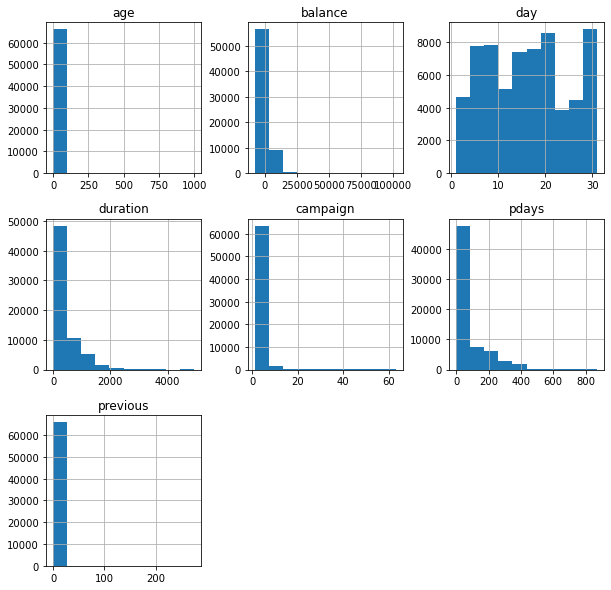

In [18]:
df.hist(column=continous_columns, figsize=(10, 10))
# column chính là các feature mà ta muốn vẽ, figsize là kích thước của hình vẽ với giá trị đầu là chiều dài, và giá trị thứ hai là chiều rộng của hình vẽ

<AxesSubplot:xlabel='age', ylabel='Count'>

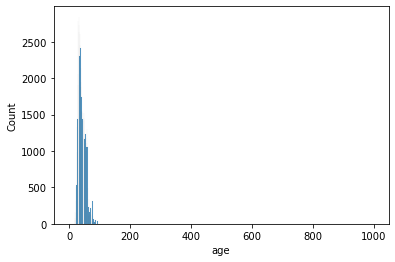

In [19]:
#Để vẽ hist cho từng feature mà ta muốn, ta có thể làm như sau: 
sns.histplot(x="age", data=df) #Nếu ta dùng x thì sẽ vẽ được hình trên trục hoành, còn dùng y thì sẽ vẽ trên trục tung
#x hoặc y là feature mà mình muốn vẽ, data chính là dataframe mà mình muốn đứa vào

<AxesSubplot:xlabel='count', ylabel='job'>

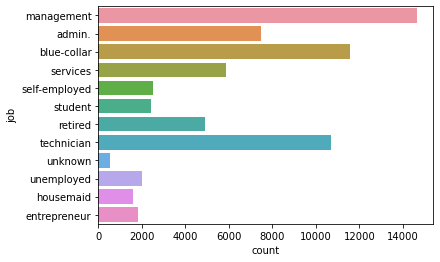

In [20]:
#Để vẽ countplot cho các biến categorical ta làm như sau
sns.countplot(y="job", data=df)

<AxesSubplot:xlabel='count', ylabel='job'>

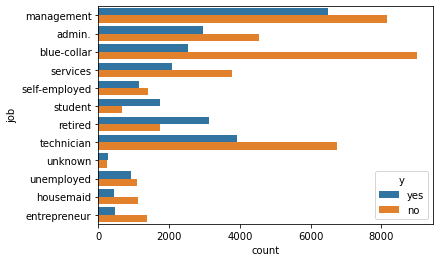

In [21]:
#Để vẽ countplot có kèm theo một feature nữa có thể dùng thêm parameter hue
sns.countplot(y="job", data=df, hue="y")
#biến hue để chia các samples theo các giá trị có trong y

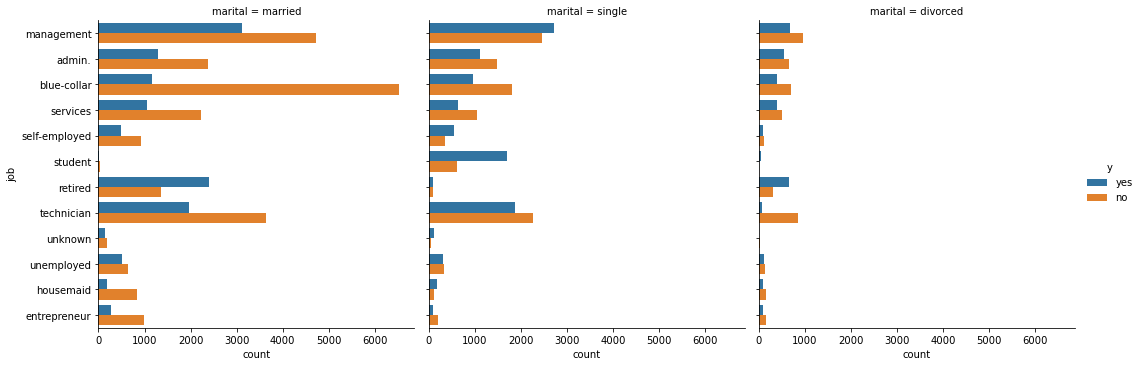

In [22]:
#Ngoài ra ta có thể dùng thêm một số features khác bằng cách sử dụng catplot
sns.catplot(y="job", data=df, hue="y", col="marital", kind="count")
#Ở đây ta sẽ vẽ countplot cho feature job, dùng hue theo các giá trị y, chia thêm các giá trị có trong feature marital, kind cho biết sẽ vẽ theo dạng gì

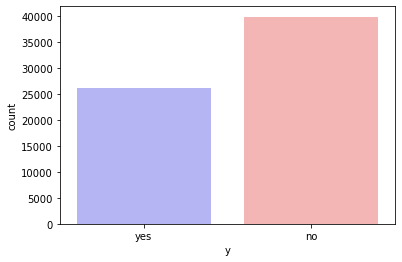

In [23]:
sns.countplot(x="y", data=df, palette="bwr") # Thống kê cột 'y'
plt.show()

<AxesSubplot:xlabel='y', ylabel='count'>

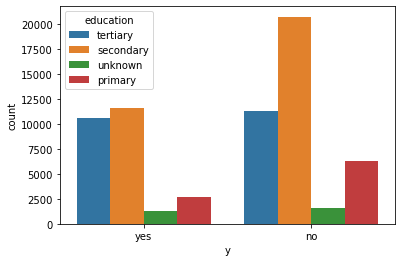

In [24]:
sns.countplot(data=df, x='y', hue='education')

<AxesSubplot:>

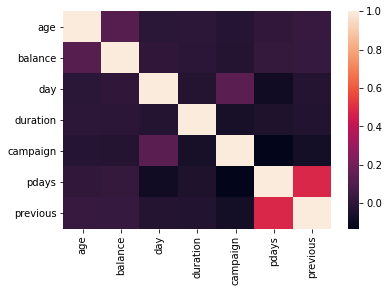

In [25]:
sns.heatmap(df.corr())

# Model Training

In [26]:
from sklearn.preprocessing import LabelEncoder

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Encode education volume as labels
    label_encoder = LabelEncoder()
    df.loc[:, "education"] = label_encoder.fit_transform(df["education"]) # 0 1 2 3 4

    cat_cols = [col for col in df.columns if df[col].dtypes == "O"] # get categorical columns
    cat_cols.remove("y") # Remove target
    # -- Method 1: categorical features -> numberic features using get_dummies()
    temp = pd.get_dummies(df[cat_cols])
    df.drop(cat_cols, axis=1, inplace=True) # Remove category columns
    df = pd.concat([df, temp], axis=1) # nối dataframe data với các giá trị dummy của feature col

    return df


In [27]:
processed_df = apply_feature_engineering(df.copy())
processed_df.head()

,age,education,balance,day,duration,campaign,pdays,previous,y,job_admin.,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,47.0,2,2351.0,2,163,2,84,1,yes,0,...,1,0,0,0,0,0,0,0,1,0
1,26.0,1,255.0,14,209,2,106,2,yes,1,...,0,0,0,0,0,0,0,0,1,0
2,26.0,1,256.0,14,210,2,106,2,yes,1,...,0,0,0,0,0,0,0,0,1,0
3,26.0,1,257.0,14,211,2,106,2,yes,1,...,0,0,0,0,0,0,0,0,1,0
4,26.0,1,258.0,14,212,2,106,2,yes,1,...,0,0,0,0,0,0,0,0,1,0


In [28]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """

    X = df.drop('y', axis=1, inplace=False).values

    y = df['y']
    y = np.array([0 if i=="no" else 1 for i in y ])
    y = y.reshape((-1, 1))
    return X, y

X, y = prepare_X_y(processed_df)

In [29]:
from sklearn.linear_model import LogisticRegression

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """


    model = LogisticRegression()
    # Todo: fit your model with X, y
    model.fit(X, y)

    return model


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)     # Split data into train and test

In [31]:
log_model = build_model(X_train, y_train)
display(log_model)

# Get score
log_model.score(X_test, y_test)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

0.9040791599353797

## Using a scaler

In [32]:
from sklearn.preprocessing import StandardScaler #Gọi thư viện để scale data về phân phối chuẩn

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) #fit_transform có tác dụng vừa fit data, vừa transform data
X_test_scaled = scaler.transform(X_test) #transform data từ hàm scaler đã train từ X_train

# Print dataframe of scaled data
display(pd.DataFrame(X_train_scaled))

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.134841,0.958491,0.168923,0.735593,0.325399,0.192122,-0.550104,-0.436967,-0.356254,-0.459503,...,-0.35741,-0.18157,-0.582914,-0.284783,4.768336,-0.201136,-0.324666,-0.215883,-0.441360,0.659217
1,3.374412,0.958491,1.006072,-0.787916,2.404948,-0.565094,0.330261,0.928228,-0.356254,-0.459503,...,-0.35741,-0.18157,-0.582914,-0.284783,-0.209717,4.971762,3.080090,-0.215883,-0.441360,-1.516952
2,1.083008,-0.377868,-0.177558,-1.256688,-0.703557,0.570730,-0.550104,-0.436967,-0.356254,-0.459503,...,-0.35741,-0.18157,-0.582914,-0.284783,-0.209717,-0.201136,-0.324666,-0.215883,-0.441360,0.659217
3,0.529911,-0.377868,-0.264256,0.266821,-0.177059,-0.565094,4.769952,0.473163,2.806983,-0.459503,...,-0.35741,-0.18157,-0.582914,-0.284783,-0.209717,-0.201136,-0.324666,-0.215883,2.265725,-1.516952
4,-0.260228,-1.714227,-0.466241,1.321558,-0.833379,0.570730,-0.550104,-0.436967,-0.356254,2.176265,...,-0.35741,-0.18157,1.715520,-0.284783,-0.209717,-0.201136,-0.324666,-0.215883,-0.441360,0.659217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46211,-0.892340,0.958491,-0.260217,1.438751,0.310974,-0.186486,1.172761,3.203553,-0.356254,-0.459503,...,-0.35741,-0.18157,-0.582914,-0.284783,-0.209717,-0.201136,-0.324666,-0.215883,2.265725,-1.516952
46212,-0.892340,-0.377868,-0.466862,1.673137,-0.876653,-0.565094,-0.550104,-0.436967,-0.356254,-0.459503,...,-0.35741,-0.18157,-0.582914,-0.284783,-0.209717,-0.201136,-0.324666,-0.215883,-0.441360,0.659217
46213,-1.129381,-0.377868,-0.469038,1.555944,-0.725194,0.192122,-0.550104,-0.436967,-0.356254,-0.459503,...,-0.35741,-0.18157,-0.582914,-0.284783,-0.209717,-0.201136,-0.324666,-0.215883,-0.441360,0.659217
46214,-1.366423,0.958491,-0.401606,-0.787916,-0.746831,-0.565094,0.330261,0.018098,-0.356254,-0.459503,...,-0.35741,-0.18157,-0.582914,-0.284783,-0.209717,-0.201136,-0.324666,-0.215883,2.265725,-1.516952


In [33]:
log_model = build_model(X_train_scaled, y_train)
display(log_model)

# Get score
log_model.score(X_test_scaled, y_test)

c:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

0.9329058966074314

In [34]:
# Thiết lập bảng kết quả dự đoán 
y_pred = log_model.predict(X_test_scaled)
y_pred = pd.DataFrame({'target': y_pred})
y_pred

,target
0,1
1,0
2,0
3,0
4,0
...,...
19803,0
19804,0
19805,0
19806,0


In [35]:
#9 Sử dụng một số metrics cho imbalanced data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

print("Precision: ", precision_score(y_test , y_pred))
print("Recall: ", recall_score(y_test , y_pred))
print("F1: ", f1_score(y_test , y_pred))
print("Confusion matrix: \n", confusion_matrix(y_test , y_pred))
print("Classification report: \n", classification_report(y_test , y_pred))

Precision:  0.9184705119896306
Recall:  0.9100950423837657
F1:  0.9142635958970389
Confusion matrix: 
 [[11393   629]
 [  700  7086]]
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94     12022
           1       0.92      0.91      0.91      7786

    accuracy                           0.93     19808
   macro avg       0.93      0.93      0.93     19808
weighted avg       0.93      0.93      0.93     19808



In [36]:
def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """

    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("Precision: ", precision_score(y_test , y_pred))
    print("Recall: ", recall_score(y_test , y_pred ))
    print("F1: ", f1_score(y_test , y_pred))
    print("Confusion matrix: \n", confusion_matrix(y_test , y_pred ))
    print("classification_report: ", classification_report(y_true, y_pred))
    return f1_score(y_test , y_pred )